In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/'

/content/drive/My Drive/Colab Notebooks


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pIC50_pubchem-fp_filtered.csv")

In [5]:
labels = df["pIC50"]

In [6]:
training_data = df.drop("pIC50",axis = 1)

In [7]:
labels.shape

(2188,)

In [8]:
training_data.shape

(2188, 202)

In [9]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.8 * (1-0.8)))
training_data = selection.fit_transform(training_data)

In [10]:
training_data.shape

(2188, 146)

In [11]:
df_train, df_test, train_labels, test_labels = train_test_split(training_data,labels, train_size=0.8,random_state=12342323)

In [12]:
model = RandomForestRegressor(n_estimators=1000)

In [13]:
model.fit(df_train,train_labels)

RandomForestRegressor(n_estimators=1000)

In [14]:
r2 = model.score(df_test,test_labels)
r2

0.6314560566215561

In [15]:
preds = model.predict(df_test)

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels,preds)

0.6547166404345587

<function matplotlib.pyplot.show(close=None, block=None)>

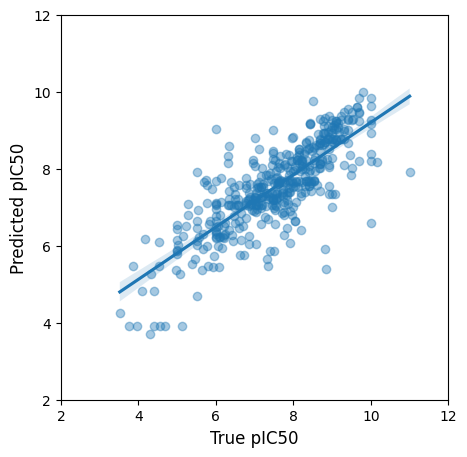

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

pl = sns.regplot(x=test_labels, y = preds, scatter_kws={'alpha':0.4})
pl.set_xlabel("True pIC50",fontsize = "large")
pl.set_ylabel("Predicted pIC50",fontsize = "large")
pl.set_xlim(2,12)
pl.set_ylim(2,12)
pl.figure.set_size_inches(5,5)
plt.show

### Comparing different algorithms

In [18]:
! pip install lazypredict

In [19]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [20]:
clf = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train, test = clf.fit(df_train,df_test,train_labels,test_labels)

 98%|█████████▊| 41/42 [00:50<00:00,  1.93it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 146
[LightGBM] [Info] Start training from score 7.488657


100%|██████████| 42/42 [00:51<00:00,  1.22s/it]


In [21]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.46,0.64,0.80,0.42
HistGradientBoostingRegressor,0.45,0.63,0.81,10.89
RandomForestRegressor,0.44,0.63,0.81,2.46
XGBRegressor,0.43,0.62,0.82,0.85
BaggingRegressor,0.40,0.60,0.84,0.38
KNeighborsRegressor,0.40,0.60,0.85,0.11
NuSVR,0.38,0.59,0.85,0.42
SVR,0.38,0.59,0.86,0.73
MLPRegressor,0.37,0.58,0.86,3.36


In [22]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.46,0.64,0.80,0.42
HistGradientBoostingRegressor,0.45,0.63,0.81,10.89
RandomForestRegressor,0.44,0.63,0.81,2.46
XGBRegressor,0.43,0.62,0.82,0.85
BaggingRegressor,0.40,0.60,0.84,0.38
KNeighborsRegressor,0.40,0.60,0.85,0.11
NuSVR,0.38,0.59,0.85,0.42
SVR,0.38,0.59,0.86,0.73
MLPRegressor,0.37,0.58,0.86,3.36


[(0.0, 1.0)]

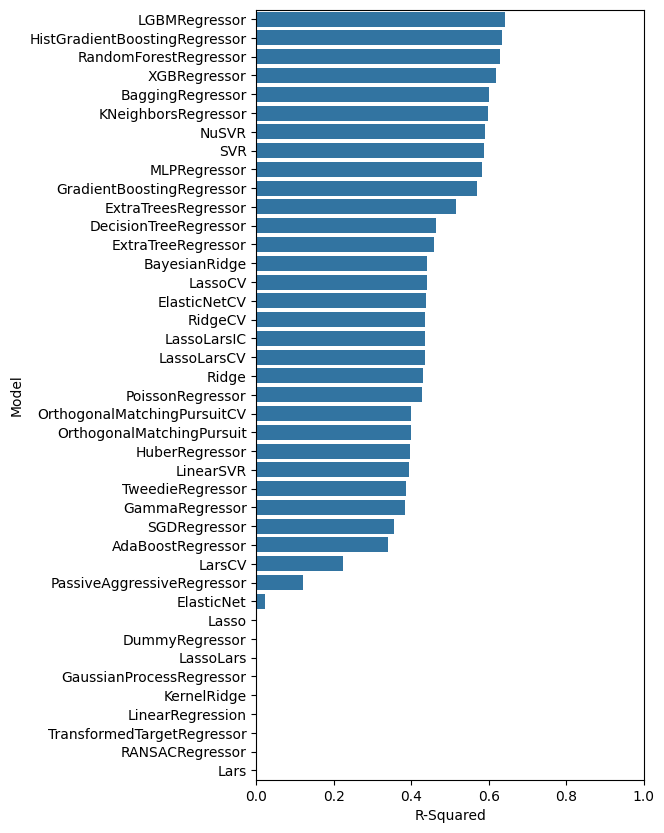

In [23]:
plt.figure(figsize=(5,10))
pl = sns.barplot(x = "R-Squared",y= train.index, data=train)
pl.set(xlim=(0,1))

[(0.0, 10.0)]

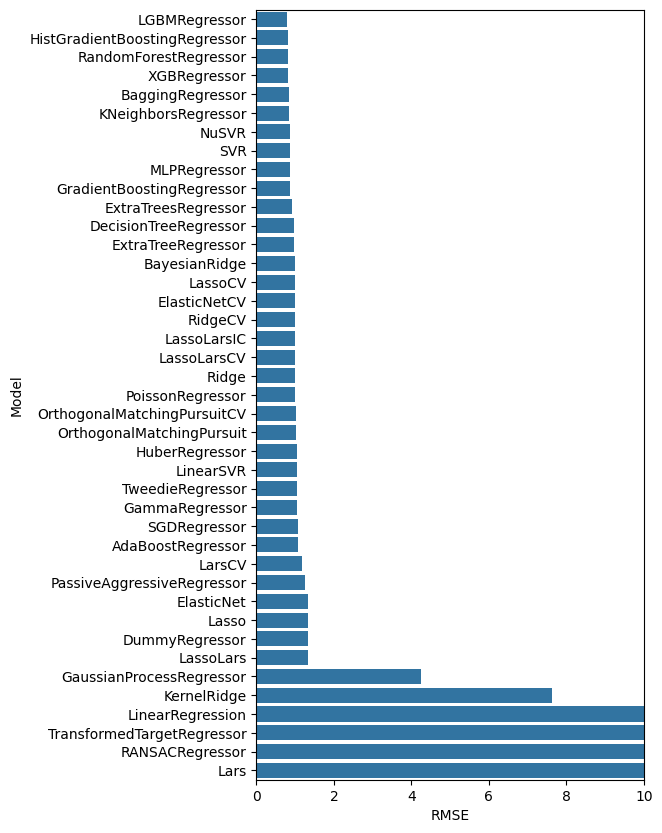

In [24]:
plt.figure(figsize=(5,10))
pl = sns.barplot(x = "RMSE",y= train.index, data=train)
pl.set(xlim=(0,10))

[(0.0, 10.0)]

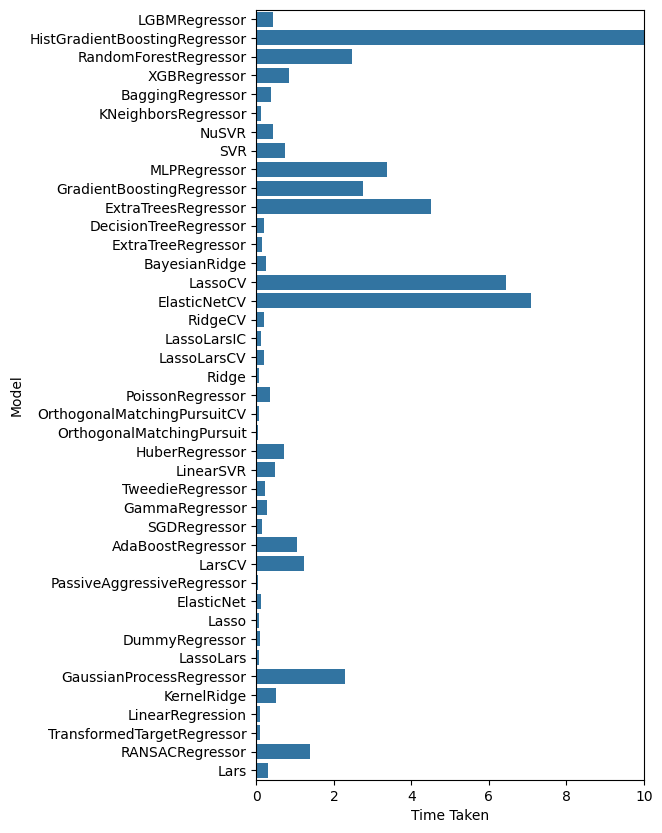

In [25]:
plt.figure(figsize=(5,10))
pl = sns.barplot(x = "Time Taken",y= train.index, data=train)
pl.set(xlim=(0,10))

#### Saving the model

In [26]:
import pickle

with open("model.pkl","wb") as f:
  pickle.dump(model,f)